In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/hotel-booking-demand/hotel_bookings.csv


In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

In [3]:
df = pd.read_csv('/kaggle/input/hotel-booking-demand/hotel_bookings.csv')

In [4]:
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

# Handling Missing Values

### We are going to impute the missing values:

* For the missing Country code we will impute 'UNK' as in unknown country.
* For the missing company value we will impute 0 because guest must have made the reservation at the counter.
* For the missing agent value we will impute 0 because guest must have made the reservation at the counter.
* For the missing children value we will impute 0 because most of the vlues in this column are 0.

In [5]:
df['country'] = df['country'].replace(np.nan,'UNK')
df['company'] = df['company'].replace(np.nan,0)
df['agent'] = df['agent'].replace(np.nan,0)
df['children']= df['children'].replace(np.nan,0)

# **EDA**
Here we will explore every feature one by one:

In [6]:
def perc_canceled_bookings(feature,dataframe=df,xticks_rotation=0,show_dataframe=False,plot=True,sort_v=False,ascend=True,top=10):
    dataframe['x'] = 'a'
    dataframe['y'] = 'b'
    no_of_canceled_bookings = dataframe.loc[dataframe['is_canceled'] == 1].groupby(feature).count()['x'].reset_index()
    no_of_total_bookings = dataframe.groupby(feature).count()['y'].reset_index()
    new_df = pd.merge(no_of_canceled_bookings,no_of_total_bookings,how='outer')
    new_df['x'] = new_df['x'].replace(np.nan,0)
    new_df['perc_canceled_bookings'] = new_df['x'] / new_df['y']
    if sort_v :
        new_df = new_df.sort_values('perc_canceled_bookings',ascending=ascend).reset_index(drop=True)
        new_df = new_df.head(top)
    del dataframe['x']
    del dataframe['y']
    new_df.columns = [feature,'total_canceled_bookings','total_bookings','perc_canceled_bookings']
    sns.set()
    if plot:
        fig , axi = plt.subplots(1,2,figsize=(12,4))
        sns.barplot(x=new_df[feature],y=new_df['perc_canceled_bookings'],ax=axi[0])
        sns.barplot(x=new_df[feature],y=new_df['total_bookings'],ax=axi[1])
        axi[0].tick_params(axis='x',rotation=xticks_rotation)
        axi[1].tick_params(axis='x',rotation=xticks_rotation)

        plt.tight_layout()


    if show_dataframe:
        
        return new_df

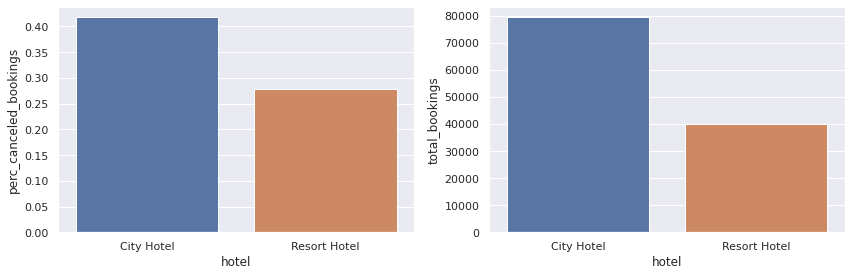

In [7]:
perc_canceled_bookings('hotel')

* a guest is more likely to book a city hotel because number of bookings for city hotel is much higher than resort hotel
* city hotel booking is more likely to be canceled.

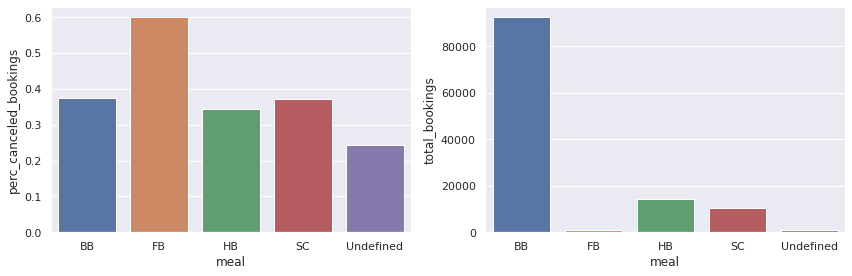

In [8]:
perc_canceled_bookings('meal')

* The least number of bookings are for FB(Breakfast + Lunch + Dinner) but they have the highest chance of being canceled.

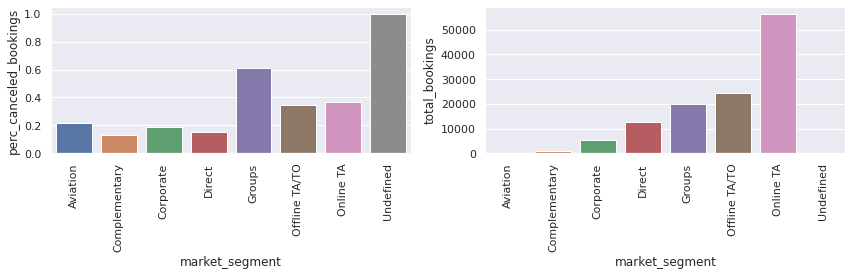

In [9]:
perc_canceled_bookings('market_segment',xticks_rotation=90)

Undefined market segment's booking are only 2 so if neglect them:
* Complementry bookings are the least likely to be canceled, which makes sense.
* Direct bookings are the second least likely to be canceled.
* Groups bookings are most likely to be canceled.


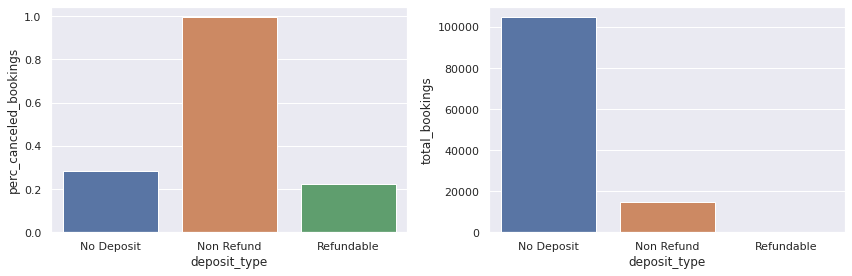

In [10]:
perc_canceled_bookings('deposit_type')

* Bookings with Non Refundable deposit type are most likely to be canceled.
* Least number of booking are with refundable deposit type and they are least likely to be canceled.

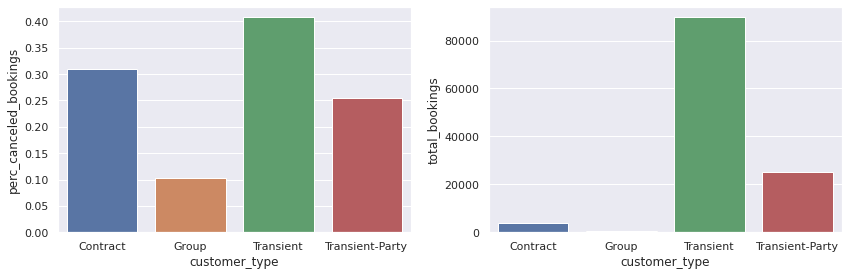

In [11]:
perc_canceled_bookings('customer_type')

* Group has the least number of bookings but they are least likely to be cancelled.
* Transient has the maximum number of bookings and they are most likely to be canceled.

In [12]:
df['is_room_same'] = np.where(df['assigned_room_type']==df['reserved_room_type'],1,0)
def perc(feature,xticks_rotation=0,dataframe=False,plot=True,sort_v=False,ascend=True,top=10):
    df['x'] = 'a'
    df['y'] = 'b'
    no_of_canceled_bookings = df.loc[df['is_canceled'] == 1].groupby([feature,'is_room_same']).count()['x'].reset_index()
    no_of_total_bookings = df.groupby([feature,'is_room_same']).count()['y'].reset_index()
    new_df = pd.merge(no_of_canceled_bookings,no_of_total_bookings)
    new_df['perc_canceled_bookings'] = new_df['x'] / new_df['y']
    if sort_v :
        new_df = new_df.sort_values('perc_canceled_bookings',ascending=ascend).reset_index(drop=True)
        new_df = new_df.head(top)
    del df['x']
    del df['y']
    new_df.columns = [feature,'is_room_same','total_canceled_bookings','total_bookings','perc_canceled_bookings']
    sns.set()
    if plot:
        fig , axi = plt.subplots(1,2,figsize=(12,4))
        sns.barplot(x=new_df[feature],y=new_df['perc_canceled_bookings'],hue=new_df['is_room_same'],ax=axi[0])
        sns.barplot(x=new_df[feature],y=new_df['total_bookings'],hue=new_df['is_room_same'],ax=axi[1])
        axi[0].tick_params(axis='x',rotation=xticks_rotation)
        axi[1].tick_params(axis='x',rotation=xticks_rotation)

        plt.tight_layout()


    if dataframe:
        
        return new_df

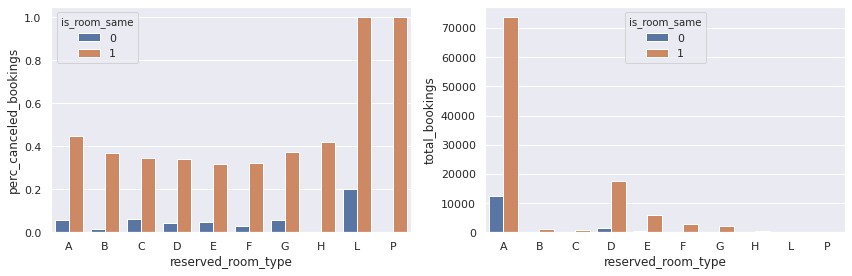

In [13]:
perc('reserved_room_type')

Reservatios for L and P rooms are very few so if don't consider them then: 
* Most of the reservatios are for room A and percentage of cancelation is also higher for room A when the assigned room type and reserved room type are same.
* So stangely if the reserved room type is same as the assigned room type then chances of booking getting canceled are higher.

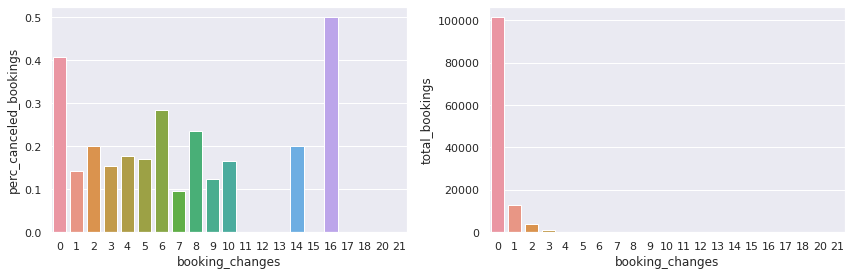

In [14]:
perc_canceled_bookings('booking_changes')

There are only 2 reservations with 16 booking changes, so if we look past that:
* Reservations with no booking changes are more likely to be canceled.
* Most of the bookings are with no booking changes.

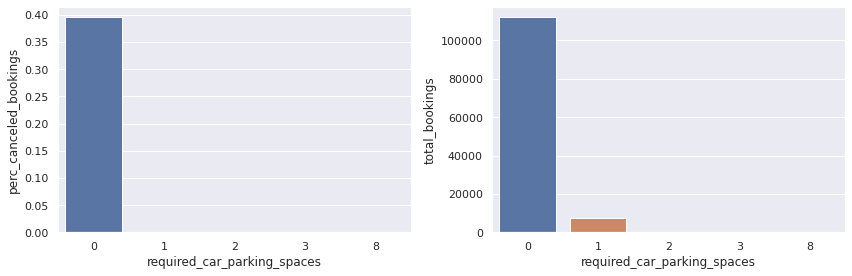

In [15]:
perc_canceled_bookings('required_car_parking_spaces')

* Guests with no required parking space are most likely to cancel their reservation.
* So if guest requires a parking space, their resevation is very less likely to be canceled.

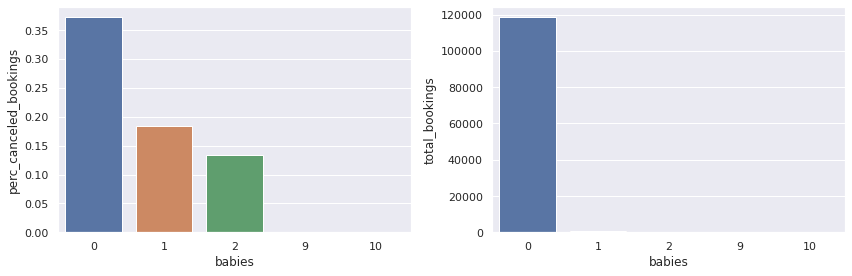

In [16]:
perc_canceled_bookings('babies')

* Guests without any babies are more likely to cancel their reservations.

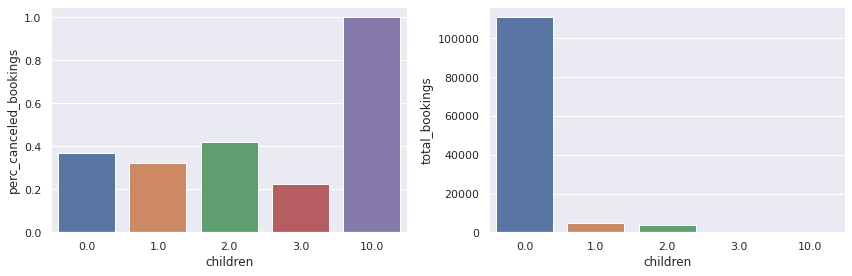

In [17]:
perc_canceled_bookings('children')

There is only one booking with 10 children so if we neglect that:
* Guests with 2 children are more likely to cancel their reservation.

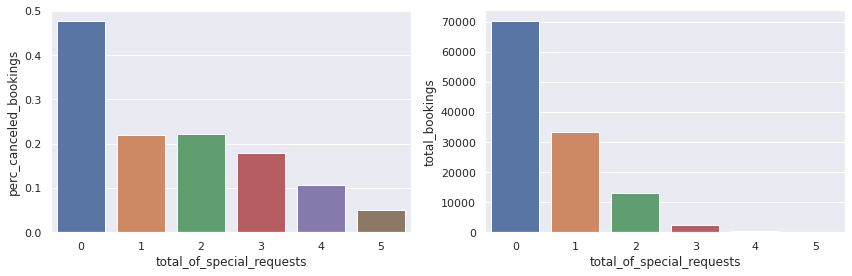

In [18]:
perc_canceled_bookings('total_of_special_requests')

* Bookings of guests with 0 special request are highest and their chances of being canceled are also highest.


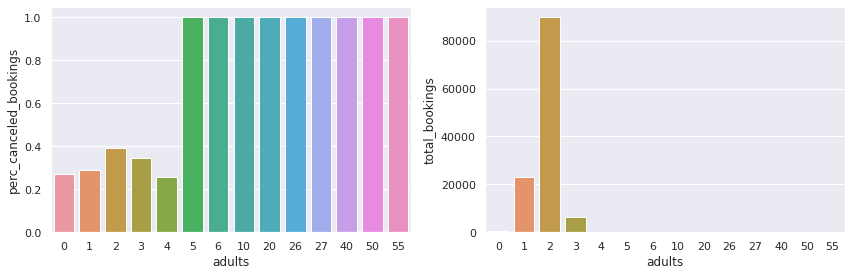

In [19]:
perc_canceled_bookings('adults')

Most of the bookings are for 0 to 4 adults so:
* Bookings for couples are most likely to be canceled.
* Most of the bookings are for couples.

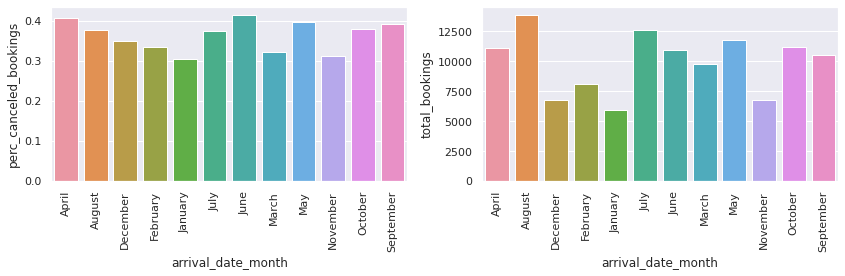

In [20]:
perc_canceled_bookings('arrival_date_month',xticks_rotation=90)

* Number of bookings are highest in august.
* Percentage of reservation cancellation is highest for june.

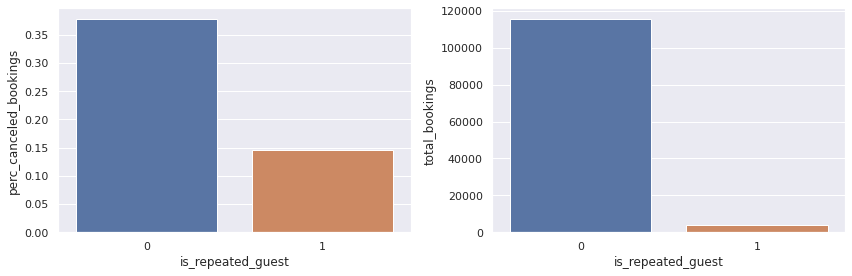

In [21]:
perc_canceled_bookings('is_repeated_guest')

* Repeated guest are less likely to cancel their reservation.

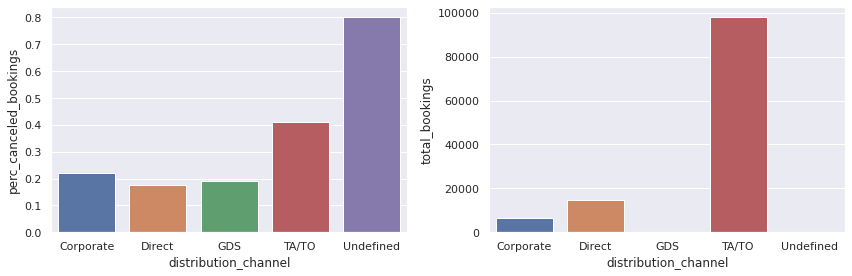

In [22]:
perc_canceled_bookings('distribution_channel')

If we neglect the undefined distribution channel:
* TA/TO channel has the highest number of bookings and the highest percentage of canceled bookings.
* Direct bookings are least likely to be canceled.

## What are the top 10 companies with maximum number of bookings and their percentage of cancelation?

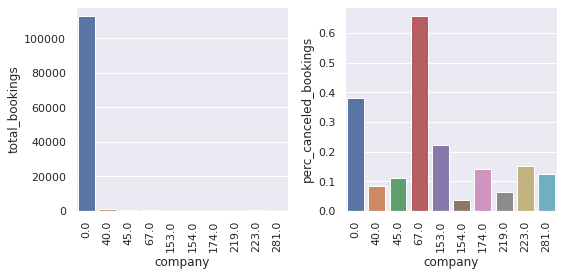

In [23]:
features = ['company']
fig, axi = plt.subplots(1,2,figsize=(8,4))

for feature in features:
    
    df1 = df.groupby(feature).count()['hotel'].reset_index().sort_values('hotel',ascending=False).reset_index(drop=True)
    df1.head()
    df2 = df.groupby([feature,'is_canceled']).count()['hotel'].reset_index().sort_values('hotel',ascending=False).reset_index(drop=True)
    df1.columns=[feature,'total_bookings']
    df2 = df2[df2['is_canceled']==1]
    del df2['is_canceled']
    df2.columns = [feature,'total_canceled_bookings']
    df3 = pd.merge(df1,df2,how='outer')
    df3 = df3.fillna(0)
    df3['perc_canceled_bookings'] = df3['total_canceled_bookings'] / df3['total_bookings']
    df3 = df3.sort_values('total_bookings',ascending=False).head(10)
    sns.barplot(data=df3,x=feature,y='total_bookings',ax=axi[0])
    sns.barplot(data=df3,x=feature,y='perc_canceled_bookings',ax=axi[1])
    
    axi[0].tick_params(axis='x',rotation=90)
    axi[1].tick_params(axis='x',rotation=90)

    plt.tight_layout()

    

In the list of top 10 companies with maximum number of bookings:

* Maximum number of bookings are done by guests on the reception(without using any company).
* company 154 has the least percentage of canceled reservations.
* But company 67 has the maximum percentage of canceled reservations.

## What are the top 10 countries with maximum number of bookings and their percentage of cancelation?

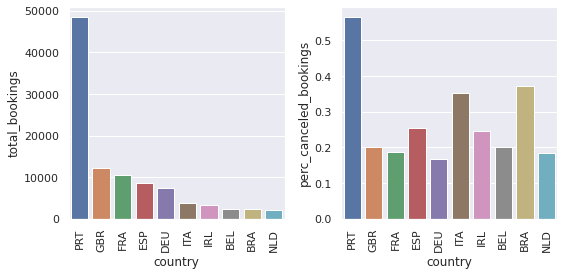

In [24]:
features = ['country']
fig, axi = plt.subplots(1,2,figsize=(8,4))

for feature in features:
    
    df1 = df.groupby(feature).count()['hotel'].reset_index().sort_values('hotel',ascending=False).reset_index(drop=True)
    df1.head()
    df2 = df.groupby([feature,'is_canceled']).count()['hotel'].reset_index().sort_values('hotel',ascending=False).reset_index(drop=True)
    df1.columns=[feature,'total_bookings']
    df2 = df2[df2['is_canceled']==1]
    del df2['is_canceled']
    df2.columns = [feature,'total_canceled_bookings']
    df3 = pd.merge(df1,df2,how='outer')
    df3 = df3.fillna(0)
    df3['perc_canceled_bookings'] = df3['total_canceled_bookings'] / df3['total_bookings']
    df3 = df3.sort_values('total_bookings',ascending=False).head(10)
    sns.barplot(data=df3,x=feature,y='total_bookings',ax=axi[0])
    sns.barplot(data=df3,x=feature,y='perc_canceled_bookings',ax=axi[1])
    
    axi[0].tick_params(axis='x',rotation=90)
    axi[1].tick_params(axis='x',rotation=90)

    plt.tight_layout()

    

In the list of top 10 countries with maximum number of bookings:

* PRT(Portugal) has the maximum number of bookings and maximum likelyhood of cancellations.
* DEU(Germany) has the least percentage of canceled bookings.

## What are the top 10 agents with maximum number of bookings and their percentage of cancelation?

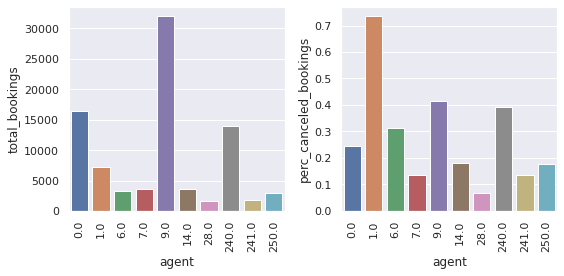

In [25]:
features = ['agent']
fig, axi = plt.subplots(1,2,figsize=(8,4))

for feature in features:
    
    df1 = df.groupby(feature).count()['hotel'].reset_index().sort_values('hotel',ascending=False).reset_index(drop=True)
    df1.head()
    df2 = df.groupby([feature,'is_canceled']).count()['hotel'].reset_index().sort_values('hotel',ascending=False).reset_index(drop=True)
    df1.columns=[feature,'total_bookings']
    df2 = df2[df2['is_canceled']==1]
    del df2['is_canceled']
    df2.columns = [feature,'total_canceled_bookings']
    df3 = pd.merge(df1,df2,how='outer')
    df3 = df3.fillna(0)
    df3['perc_canceled_bookings'] = df3['total_canceled_bookings'] / df3['total_bookings']
    df3 = df3.sort_values('total_bookings',ascending=False).head(10)
    sns.barplot(data=df3,x=feature,y='total_bookings',ax=axi[0])
    sns.barplot(data=df3,x=feature,y='perc_canceled_bookings',ax=axi[1])
    
    axi[0].tick_params(axis='x',rotation=90)
    axi[1].tick_params(axis='x',rotation=90)

    plt.tight_layout()

    

In the list of top 10 agents with maximum number of bookings:
* Agent 9 has the maximum number of bookings and second highest percentage of canceled bookings.
* Agent 1 has the highest percentage of canceled bookings.
* Agent 28 has the least number of bookings and least percentage of canceled bookings.

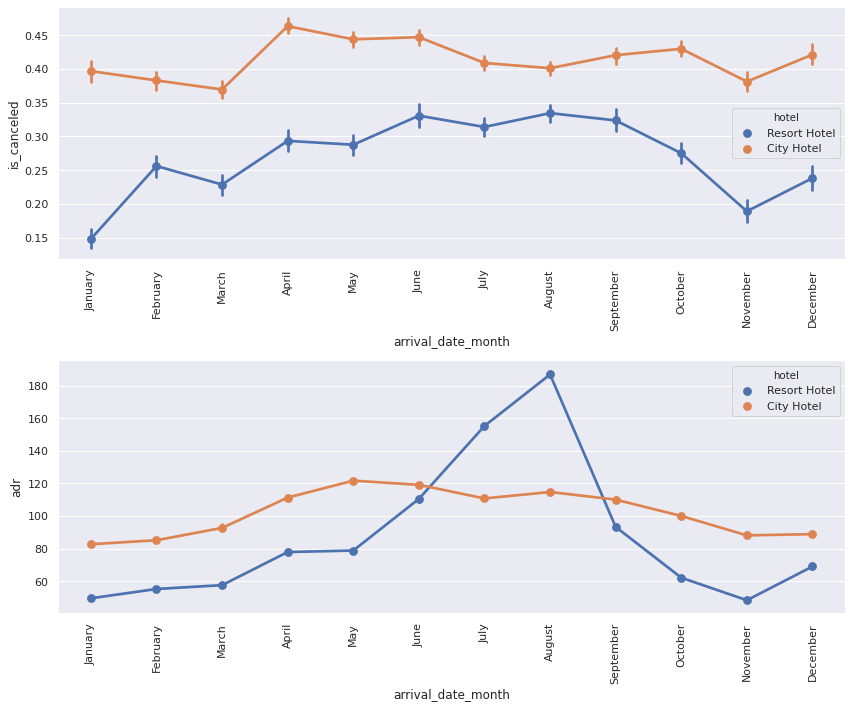

In [26]:
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
              'July', 'August', 'September', 'October', 'November', 'December']

fig, axi = plt.subplots(2,1,figsize=(12,10))
sns.pointplot(data=df,x='arrival_date_month',y='adr',hue='hotel',order=month_order,ax=axi[1])
sns.pointplot(data=df,x='arrival_date_month',y='is_canceled',hue='hotel',order=month_order,ax=axi[0])

axi[0].tick_params(axis='x',rotation=90)
axi[1].tick_params(axis='x',rotation=90)

plt.tight_layout()

* Average daily rate is least on january for both city hotel and resort hotel.
* Average daily rate is higher for city hotels than resort hotel except for the months july and august.

In next version we will create a model.